## Data in Brief Notebook
This notebook is intended to assist with generation of images and charts from raw AIS data and is associated with the Data In Brief article being prepared in this repo.

In [1]:
import pandas as pd
import json

## Convert JSON from AISHUB website into csv for QGIS

infile = './data/aishub_location.json'

with open(infile) as data_file:    
    data = json.load(data_file)
df = pd.json_normalize(data, 'stations')

df.to_csv('./data/aishub_stations.csv')

## Cleaning up the joined file created by QGIS

infile3 = './data/openais-vessel-density.csv'
df3 = pd.read_csv(infile3)

infile2 = './data/openais-vessel-density-all-joined3.csv'

df3[df3['gid'] == 43888]

df2 = pd.read_csv(infile2)

df2 = df2[df2['year'].notna()]
df2.to_csv('./data/openais-vessel-density-all-joined3.csv')

## Generate histogram of Band Math Rasters
The EMOD2022 - OpenAIS 2022 file has a resolution of 7508 x 6431 pixels, 48.3M pixels


In [2]:
# ! pip install rasterio

In [3]:
import rasterio
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats

In [4]:
## Choose raster file to examine

# raster_file = './data/BandMaths/NDVI.tif'
raster_file1 = './data/EMODnet_HA_Vessel_Density_all_2017-2022Avg/vesseldensity_all_2022.tif'
raster_file2 = './data/BandMaths/Emod2022-OpenAIS2022.tif'
raster_file3 = './data/OpenAIS-vessel_density2.tif'

In [5]:
## Open the raster files
raster1 = rasterio.open(raster_file1)
band1 = raster1.read(1, masked=True)
band1 = band1.filled(np.nan)
band_nanfree1 = band1[~np.isnan(band1)]
band_nanfree1  = band_nanfree1[~np.isinf(band_nanfree1)]

raster2 = rasterio.open(raster_file2)
band2 = raster2.read(1, masked=True)
band2 = band2.filled(np.nan)
band_nanfree2 = band2[~np.isnan(band2)]
band_nanfree2  = band_nanfree2[~np.isinf(band_nanfree2)]
band_nanfree2  = band_nanfree2[np.nonzero(band_nanfree2)]


raster3 = rasterio.open(raster_file3)
band3 = raster3.read(1, masked=True)
band3 = band3.filled(np.nan)
band_nanfree3 = band3[~np.isnan(band3)]
band_nanfree3  = band_nanfree3[~np.isinf(band_nanfree3)]

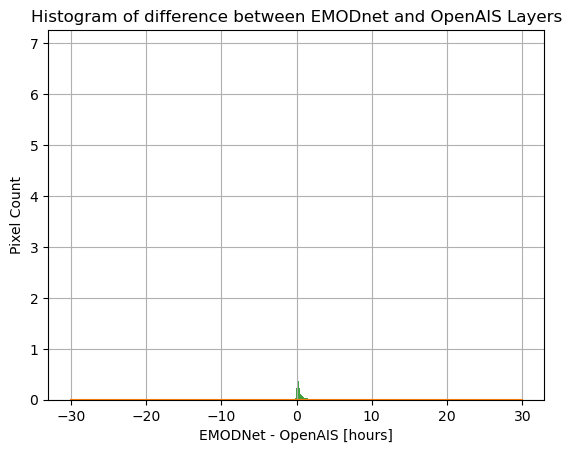

In [6]:
# the histogram of the data
# n, bins, patches = plt.hist(band_nanfree1, np.arange(-30,30,0.05), facecolor='green', alpha=0.75)
bins = np.arange(-30,30,0.1)

n, bins, patches = plt.hist(band_nanfree2, bins, facecolor='green', alpha=0.75, density=True,stacked=True)
kde = stats.gaussian_kde(band_nanfree2)
plt.plot(bins,kde(bins))

plt.xlabel('EMODNet - OpenAIS [hours]')
plt.ylabel('Pixel Count')
plt.title(r'Histogram of difference between EMODnet and OpenAIS Layers')
# ax.set_xlim(-10, 10)
# ax.set_ylim(0, 1)
plt.grid(True)
# plt.yscale('log')
plt.show()

In [7]:
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

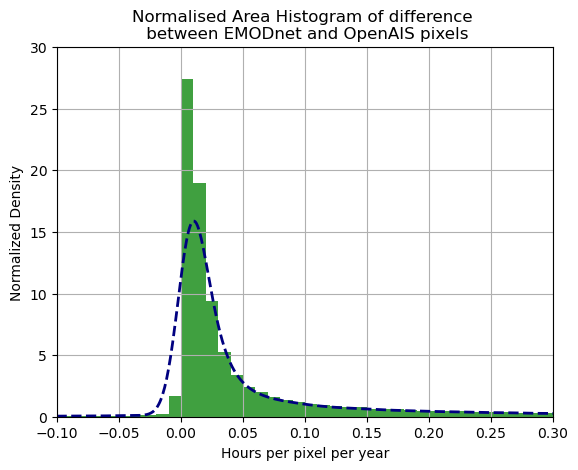

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100000
bins = np.arange(-2,2,0.01)
np.random.seed(1)
band_sample = np.random.choice(band_nanfree2, N)
X = band_sample.reshape(-1,1)

X_plot = np.linspace(-2, 2, 5000)[:, np.newaxis]
fig, ax = plt.subplots() 
colors = ["navy"]
kernels = ["gaussian"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.01).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="--",
        label="kernel = '{0}'".format(kernel),
    )
    
#  Histogram

bandlen = band_sample.shape[0]
# band_sample = band_sample/bandlen
n, bins, patches = ax.hist(band_sample, bins, facecolor='green', alpha=0.75, density=True, stacked=False)

ax.set_xlim(-0.1, 0.3)
ax.set_ylim(0, 30)
ax.set_title("Normalised Area Histogram of difference \n between EMODnet and OpenAIS pixels")
ax.set_ylabel("Normalized Density")
ax.set_xlabel("Hours per pixel per year")
plt.grid(True)
# plt.show()
plt.savefig('./images/Fig4.png')

In [13]:
plt.savefig('./images/Fig4.png')

<Figure size 640x480 with 0 Axes>